In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from tensorflow.keras.utils import plot_model

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]



In [ ]:
data = pd.read_csv('/content/KDDTrain.csv',header=None, names=col_names)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
# number of attack labels
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

**DATA NORMALIZATION**

In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df


In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)

**ONE HOT ENCODING**

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9


In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_0,protocol_type_1,protocol_type_2,service_0,service_1,service_2,service_3,service_4,service_5,service_6,...,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Save the preprocessed data
data.to_csv('/content/clean.csv', index=False)

In [ ]:
 #Calculate the correlation matrix
corr_matrix = data.corr()

# Select the features with correlation coefficient greater than 0.9
selected_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            if data.columns[i] not in selected_features:
                selected_features.append(data.columns[i])
            if data.columns[j] not in selected_features:
                selected_features.append(data.columns[j])

# Print the selected features
print(selected_features)

['num_compromised', 'num_root', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load your dataset (replace 'city_day.csv' with the actual path to your CSV file)
# data = pd.read_csv('/content/clean.csv')

# Specify the target variable (the variable you want to predict)
target_variable = 'label'  # Replace with your target variable name

# Split the data into features (X) and target variable (y)
X = data.drop(target_variable, axis=1) # Features (remove the target variable)
y = data[target_variable]  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, you have X_train (training features), y_train (training target), X_test (testing features), and y_test (testing target)
# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

# Optionally, you can also print a few samples from the train and test sets
print("\nSample from the training set:")
print(X_train.head())  # Display the first few rows of the training features
print(y_train.head())  # Display the corresponding target values

print("\nSample from the testing set:")
print(X_test.head())  # Display the first few rows of the testing features
print(y_test.head())  # Display the corresponding target values

# Save the training set to a CSV file
X_train.to_csv('train.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)

# Save the testing set to a CSV file
X_test.to_csv('test.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

Training set - Features: (94479, 41) Target: (94479,)
Testing set - Features: (31494, 41) Target: (31494,)

Sample from the training set:
        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
69124          0              1       17     5          0          0     0   
20983          0              1       57     5          0          0     0   
113664         0              1       49     5          0          0     0   
110444         0              1       20     9          9          0     0   
75941          0              2       44     9        504          3     0   

        wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
69124                0       0    0  ...             255                  12   
20983                0       0    0  ...             255                  21   
113664               0       0    0  ...              58                   1   
110444               0       0    0  ...              28                 

**CNN Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess your IoT network dataset
data= pd.read_csv('/content/test.csv')
# You will need to load your dataset and preprocess it appropriately.

# Perform label encoding for categorical labels (attack types)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y))  # Number of unique classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the 1D CNN model
model = Sequential()

# Convolutional layers
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling1D())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 500
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/20
162/162 - 11s - loss: 0.9919 - accuracy: 0.7654 - val_loss: 0.2865 - val_accuracy: 0.9295 - 11s/epoch - 68ms/step
Epoch 2/20
162/162 - 1s - loss: 0.2468 - accuracy: 0.9348 - val_loss: 0.1676 - val_accuracy: 0.9523 - 833ms/epoch - 5ms/step
Epoch 3/20
162/162 - 1s - loss: 0.1635 - accuracy: 0.9546 - val_loss: 0.1097 - val_accuracy: 0.9678 - 748ms/epoch - 5ms/step
Epoch 4/20
162/162 - 1s - loss: 0.1254 - accuracy: 0.9643 - val_loss: 0.0882 - val_accuracy: 0.9698 - 818ms/epoch - 5ms/step
Epoch 5/20
162/162 - 1s - loss: 0.1017 - accuracy: 0.9718 - val_loss: 0.0728 - val_accuracy: 0.9795 - 887ms/epoch - 5ms/step
Epoch 6/20
162/162 - 1s - loss: 0.0872 - accuracy: 0.9759 - val_loss: 0.0689 - val_accuracy: 0.9797 - 941ms/epoch - 6ms/step
Epoch 7/20
162/162 - 1s - loss: 0.0783 - accuracy: 0.9777 - val_loss: 0.0559 - val_accuracy: 0.9834 - 1s/epoch - 7ms/step
Epoch 8/20
162/162 - 1s - loss: 0.0688 - accuracy: 0.9806 - val_loss: 0.0510 - val_accuracy: 0.9848 - 969ms/epoch - 6ms/step
Epo

In [ ]:
loss1,accuracy1 = model.evaluate(X_test, y_test,batch_size = 128)
print(loss1,accuracy1)

197/197 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9893
0.037064697593450546 0.989283561706543


In [ ]:
y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

788/788 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       0.00      0.00      0.00         9
           3       1.00      0.82      0.90        11
           4       0.00      0.00      0.00         1
           5       0.96      0.98      0.97       733
           6       0.60      1.00      0.75         3
           9       1.00      1.00      1.00      8228
          10       0.95      0.94      0.94       313
          11       0.99      0.99      0.99     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.93      0.96        43
          15       0.97      1.00      0.98       573
          16       0.00      0.00      0.00         1
          17       0.99      0.96      0.97       738
          18       1.00      1.00      1.00       534
          19       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model.metrics_names)


['loss', 'accuracy']


In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epochs')

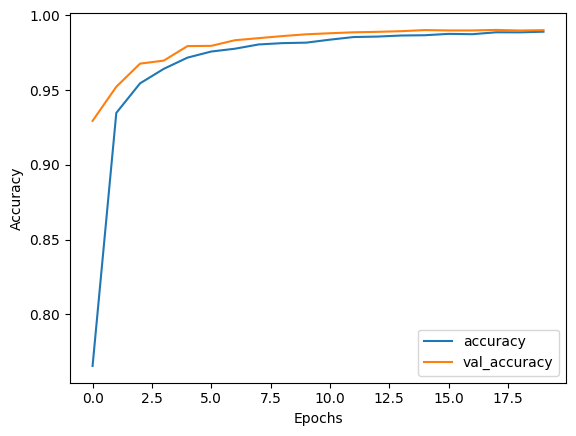

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

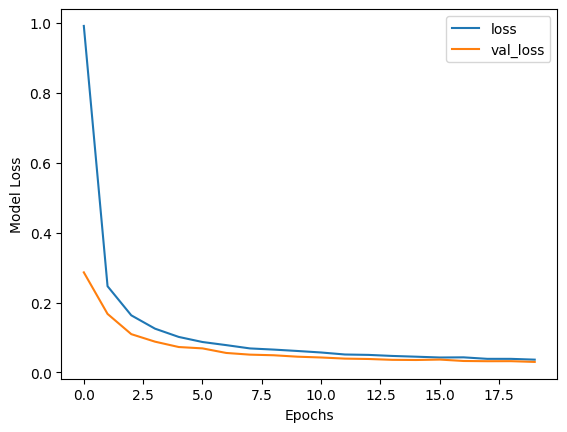

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

**LSTM MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess your IoT network dataset
data= pd.read_csv('/content/test.csv')
# You will need to load your dataset and preprocess it appropriately.

# Perform label encoding for categorical labels (attack types)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y))  # Number of unique classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 500
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Epoch 1/20
152/152 - 9s - loss: 1.0774 - accuracy: 0.6838 - val_loss: 0.4281 - val_accuracy: 0.8860 - 9s/epoch - 62ms/step
Epoch 2/20
152/152 - 2s - loss: 0.3381 - accuracy: 0.9067 - val_loss: 0.2254 - val_accuracy: 0.9312 - 2s/epoch - 16ms/step
Epoch 3/20
152/152 - 3s - loss: 0.2204 - accuracy: 0.9396 - val_loss: 0.1685 - val_accuracy: 0.9478 - 3s/epoch - 20ms/step
Epoch 4/20
152/152 - 3s - loss: 0.1724 - accuracy: 0.9520 - val_loss: 0.1430 - val_accuracy: 0.9601 - 3s/epoch - 17ms/step
Epoch 5/20
152/152 - 3s - loss: 0.1911 - accuracy: 0.9504 - val_loss: 0.1501 - val_accuracy: 0.9567 - 3s/epoch - 17ms/step
Epoch 6/20
152/152 - 3s - loss: 0.1221 - accuracy: 0.9668 - val_loss: 0.1315 - val_accuracy: 0.9637 - 3s/epoch - 17ms/step
Epoch 7/20
152/152 - 3s - loss: 0.0975 - accuracy: 0.9729 - val_loss: 0.0780 - val_accuracy: 0.9766 - 3s/epoch - 17ms/step
Epoch 8/20
152/152 - 3s - loss: 0.0832 - accuracy: 0.9777 - val_loss: 0.0720 - val_accuracy: 0.9790 - 3s/epoch - 19ms/step
Epoch 9/20
152/1

In [ ]:
loss2,accuracy2 = model.evaluate(X_test, y_test,batch_size = 128)
print(loss2,accuracy2)

197/197 [==============================] - 2s 8ms/step - loss: 0.0579 - accuracy: 0.9806
0.05794209614396095 0.9805517196655273


In [ ]:
print(model.metrics_names)
print(loss2,accuracy2)

['loss', 'accuracy']
0.05794209614396095 0.9805517196655273


In [ ]:
y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

788/788 [==============================] - 4s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.28      0.43       185
           1       0.00      0.00      0.00         9
           3       0.75      0.82      0.78        11
           4       0.00      0.00      0.00         1
           5       0.97      0.95      0.96       733
           6       0.25      0.33      0.29         3
           9       1.00      1.00      1.00      8228
          10       0.97      0.90      0.93       313
          11       0.98      0.99      0.98     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.93      0.96        43
          15       0.95      0.98      0.96       573
          16       0.00      0.00      0.00         1
          17       0.99      0.93      0.96       738
          18       1.00      1.00      1.00       534
          19       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epochs')

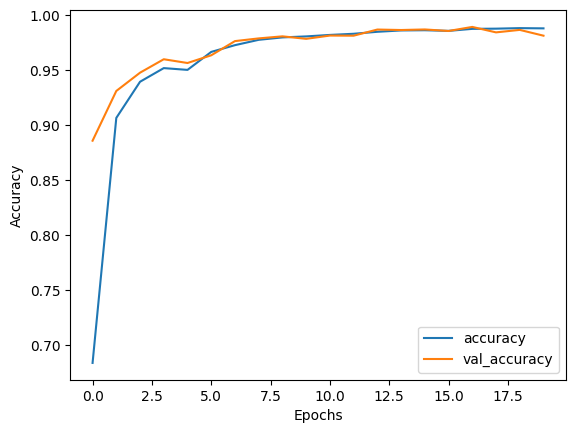

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

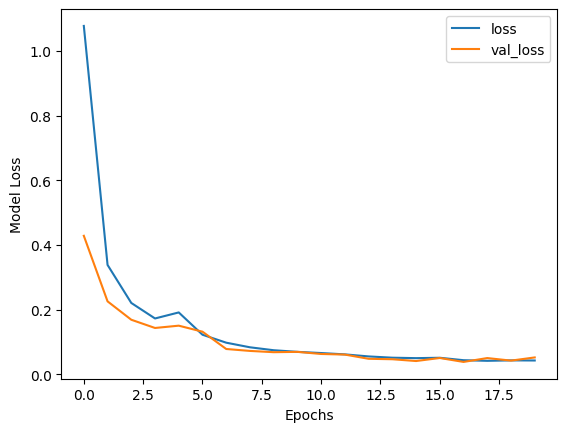

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

**DNN MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess your IoT network dataset
# You will need to load your dataset and preprocess it appropriately.

# Perform label encoding for categorical labels (attack types)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y))  # Number of unique classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the DNN model
model = Sequential()

# Fully connected layers (Dense layers)
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 500
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Epoch 1/20
162/162 - 2s - loss: 0.6955 - accuracy: 0.8475 - val_loss: 0.1504 - val_accuracy: 0.9520 - 2s/epoch - 11ms/step
Epoch 2/20
162/162 - 1s - loss: 0.2094 - accuracy: 0.9432 - val_loss: 0.0890 - val_accuracy: 0.9696 - 625ms/epoch - 4ms/step
Epoch 3/20
162/162 - 1s - loss: 0.1517 - accuracy: 0.9570 - val_loss: 0.0685 - val_accuracy: 0.9770 - 570ms/epoch - 4ms/step
Epoch 4/20
162/162 - 1s - loss: 0.1200 - accuracy: 0.9662 - val_loss: 0.0565 - val_accuracy: 0.9856 - 555ms/epoch - 3ms/step
Epoch 5/20
162/162 - 1s - loss: 0.1039 - accuracy: 0.9714 - val_loss: 0.0487 - val_accuracy: 0.9887 - 618ms/epoch - 4ms/step
Epoch 6/20
162/162 - 1s - loss: 0.0907 - accuracy: 0.9746 - val_loss: 0.0440 - val_accuracy: 0.9892 - 616ms/epoch - 4ms/step
Epoch 7/20
162/162 - 1s - loss: 0.0823 - accuracy: 0.9775 - val_loss: 0.0413 - val_accuracy: 0.9901 - 555ms/epoch - 3ms/step
Epoch 8/20
162/162 - 1s - loss: 0.0751 - accuracy: 0.9790 - val_loss: 0.0392 - val_accuracy: 0.9896 - 555ms/epoch - 3ms/step
Ep

In [ ]:
loss3,accuracy3 = model.evaluate(X_test, y_test,batch_size = 128)
print(loss3,accuracy3)

197/197 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9916
0.031349603086709976 0.9916253089904785


In [ ]:
print(model.metrics_names)


['loss', 'accuracy']


In [ ]:
y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

788/788 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.50      0.11      0.18         9
           3       1.00      0.91      0.95        11
           4       0.00      0.00      0.00         1
           5       0.94      0.96      0.95       733
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.93      0.95      0.94       313
          11       0.99      0.99      0.99     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.93      0.96        43
          15       0.99      0.99      0.99       573
          16       0.00      0.00      0.00         1
          17       1.00      0.95      0.98       738
          18       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epochs')

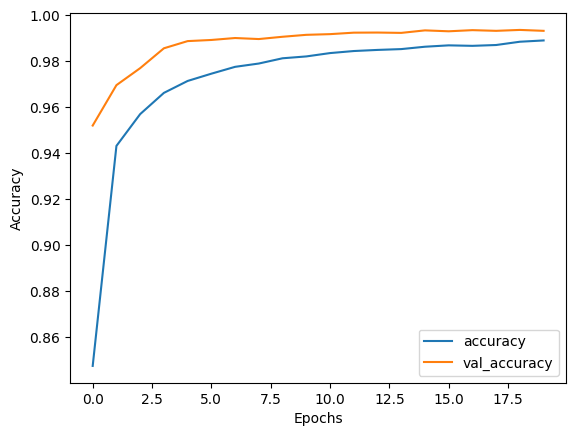

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

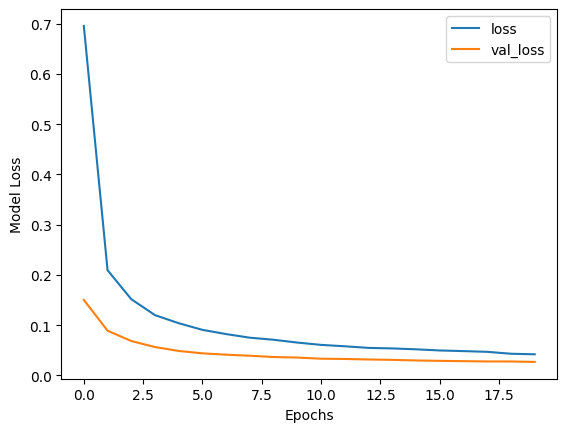

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.ylabel('Model Loss')
plt.xlabel('Epochs')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, RepeatVector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess your IoT network dataset
data= pd.read_csv('/content/test.csv')
# You will need to load your dataset and preprocess it appropriately.

# Perform label encoding for categorical labels (attack types)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y))  # Number of unique classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Define the Autoencoder-based Classifier model
encoder_input = Input(shape=(X_train.shape[1], 1))
encoder = LSTM(64, return_sequences=True)(encoder_input)
encoder = LSTM(128, return_sequences=True)(encoder)
encoder = LSTM(64)(encoder)

# Classification Layer
classification_output = Dense(num_classes, activation='softmax')(encoder)

# Create the Autoencoder-based Classifier model
autoencoder_classifier = Model(encoder_input, classification_output)

# Compile the model
autoencoder_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 500
epochs = 5
history = autoencoder_classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = autoencoder_classifier.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model if needed


Epoch 1/5
142/142 - 10s - loss: 1.0931 - accuracy: 0.6955 - val_loss: 0.5264 - val_accuracy: 0.8750 - 10s/epoch - 69ms/step
Epoch 2/5
142/142 - 2s - loss: 0.3740 - accuracy: 0.9121 - val_loss: 0.2615 - val_accuracy: 0.9305 - 2s/epoch - 18ms/step
Epoch 3/5
142/142 - 3s - loss: 0.2118 - accuracy: 0.9398 - val_loss: 0.1735 - val_accuracy: 0.9486 - 3s/epoch - 18ms/step
Epoch 4/5
142/142 - 3s - loss: 0.1626 - accuracy: 0.9574 - val_loss: 0.1826 - val_accuracy: 0.9498 - 3s/epoch - 19ms/step
Epoch 5/5
142/142 - 2s - loss: 0.1320 - accuracy: 0.9629 - val_loss: 0.0998 - val_accuracy: 0.9752 - 2s/epoch - 17ms/step
985/985 - 5s - loss: 0.1083 - accuracy: 0.9739 - 5s/epoch - 5ms/step
Test Accuracy: 97.39%


In [ ]:
y_predict = model.predict(X_test)
y_pred = y_predict.argmax(axis=-1)
y_test = y_test.argmax(axis = -1 )
report = classification_report(y_test, y_pred)
print(report)

985/985 [==============================] - 5s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.31      0.46       222
           1       0.00      0.00      0.00        10
           3       0.73      0.85      0.79        13
           4       0.00      0.00      0.00         3
           5       0.97      0.95      0.96       918
           6       0.40      0.50      0.44         4
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     10316
          10       0.97      0.90      0.93       383
          11       0.98      0.99      0.98     16774
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      0.94      0.97        53
          15       0.96      0.98      0.97       727
          16       0.00      0.00      0.00         3
          17       0.99      0.94      0.96       919
          18       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_predict = model.predict(X_test)
y_predict


788/788 [==============================] - 4s 5ms/step


array([[2.4286257e-06, 7.4292598e-07, 1.8486093e-06, ..., 1.5128677e-07,
        1.0872239e-05, 3.6143447e-06],
       [4.0286256e-14, 1.9658472e-13, 3.9412298e-10, ..., 1.5123023e-11,
        1.4218795e-12, 3.0349331e-11],
       [8.7491880e-15, 3.7141077e-14, 1.1415230e-10, ..., 2.8280002e-12,
        2.8545260e-13, 7.6933598e-12],
       ...,
       [8.7728069e-05, 4.5823246e-05, 3.5615678e-05, ..., 3.6285557e-05,
        5.2192761e-04, 7.2626535e-05],
       [2.5990406e-05, 3.9369264e-04, 6.3393119e-04, ..., 8.4151961e-06,
        2.6434173e-03, 5.6707580e-04],
       [2.1482922e-15, 8.2626539e-15, 3.9466371e-11, ..., 7.7658436e-13,
        5.8654531e-14, 2.0315962e-12]], dtype=float32)

In [ ]:
import numpy as np

# Example array of model output (replace with your actual output)
model_output = np.array([[2.4286257e-06, 7.4292598e-07, 1.8486093e-06],
                        [4.0286256e-14, 1.9658472e-13, 3.9412298e-10],
                        [8.7491880e-15, 3.7141077e-14, 1.1415230e-10]])

# List of attack categories (replace with your actual attack categories)
attack_categories = ["Normal", "AttackType1", "AttackType2"]

# Map model output to attack types
predicted_attack_types = [attack_categories[np.argmax(output)] for output in model_output]

# Print the detected attack types
for i, attack_type in enumerate(predicted_attack_types):
    print(f"Sample {i+1}: Detected Attack Type - {attack_type}")


Sample 1: Detected Attack Type - Normal
Sample 2: Detected Attack Type - AttackType2
Sample 3: Detected Attack Type - AttackType2


In [ ]:
# List of detected attacks
detected_attacks = ["SQL Injection", "DDoS Attack", "Malware", "Brute Force"]

# Iterate through the list and print each detected attack
for attack in detected_attacks:
    print(f"Detected Attack: {attack}")

# You can also log the detected attacks if needed
# Example using the logging module
import logging

logging.basicConfig(filename='intrusion_detection.log', level=logging.INFO)

for attack in detected_attacks:
    logging.info(f"Detected Attack: {attack}")


Detected Attack: SQL Injection
Detected Attack: DDoS Attack
Detected Attack: Malware
Detected Attack: Brute Force


In [ ]:
import logging

# Configure the logger
logging.basicConfig(filename='intrusion_detection.log', level=logging.INFO)

# Log important events
logging.info("Intrusion detected. IP address: 192.168.1.100")
